In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from termcolor import colored
from scipy import stats
sns.set_theme(style="whitegrid")

We have the following hashfunctions:

In [39]:
with open("./hashes.json", "r") as ifile:
    res = ifile.readlines()
    res = [json.loads(i) for i in res]
    results = {}
    for i in res:
        results[i["name"]] = i
print("available hashes to test:", results.keys())

available hashes to test: dict_keys(['naive_modulo'])


# functions you can use

In [3]:
def quick_analyze(name):
    '''
    input: hash name
    output: chi squared tests and avg hashing speed
    '''
    global results
    relevant = results[name]
    print(f"average hashing speed in ns, lower is better: {relevant['avg_time']}")
    
    print("chi squared according to wiki page, we want it to be between [0.95, 1.05]")
    ch2_wiki = ["chi_wiki_prime_iter", "chi_wiki_prime_rand", "chi_wiki_two_iter", "chi_wiki_two_rand"]
    for i in ch2_wiki:
        j = relevant[i]
        if j > 0.95 and j < 1.05:
            print(i, colored(j, "green"))
        else:
            print(i, colored(j, "red"))
            
    print("chi squared according to other source, we want it to be as close to 0 as possible")        
    print("I have marked those > 0.2 as bad, idk what a good cutoff value is")
    ch2_other = ["chi_other_prime_iter", "chi_other_prime_rand", "chi_other_two_iter","chi_other_two_rand" ]
    for i in ch2_other:
        j = relevant[i]
        if j < 0.2:
            print(i, colored(j, "green"))
        else:
            print(i, colored(j, "red"))



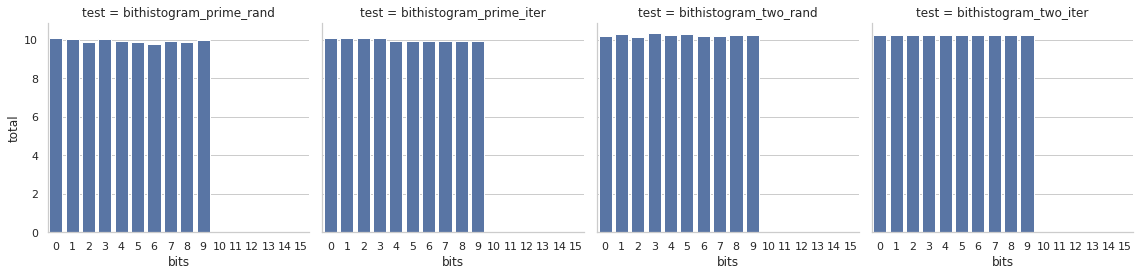

In [40]:

quick = results["naive_modulo"]

col_list = ["bithistogram_prime_rand",
"bithistogram_prime_iter",
"bithistogram_two_rand",
"bithistogram_two_iter"]
                
bitgram = pd.DataFrame(columns=["bits", "total","test"])

for i in col_list:
    temp = np.array(quick[i])/1000
    temp = pd.DataFrame([range(0,32), temp, [i for j in range(0,32)]])
    temp = temp.T
    temp.columns = bitgram.columns    
    bitgram = bitgram.append(temp)



g = sns.FacetGrid(bitgram, col="test", height=4, aspect=1)
g.map(sns.barplot, "bits", "total", order=range(0,16))


In [12]:
# print(results["naive_modulo"].keys())

tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
